<a href="https://colab.research.google.com/github/akshaypat444/tensorflow_practice/blob/main/Kaggle_Regression_HousingPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
train_data = pd.read_csv("/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/house-prices-advanced-regression-techniques/test.csv")

In [5]:
train_data.shape, test_data.shape

((1460, 81), (1459, 80))

In [16]:
X_train = train_data.drop("SalePrice", axis=1)
y_train = train_data['SalePrice']

X_test = train_data.drop("SalePrice", axis=1)
y_test = train_data['SalePrice']

In [23]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [32]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), ["LotArea", "YrSold", "MoSold", "OverallQual", "OverallCond", "YearBuilt",  "1stFlrSF", "2ndFlrSF", "GrLivArea",
                      "BsmtFullBath","BsmtHalfBath",	"FullBath" ,	"HalfBath" ,	"BedroomAbvGr" ,	"KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
                      "GarageCars", "YrSold"]),
    (OneHotEncoder(handle_unknown="ignore"), ["Street", "SaleCondition", "LotShape", "Utilities", "LotConfig", "HouseStyle"])
)

X_train = train_data.drop("SalePrice", axis=1)
y_train = train_data["SalePrice"]

X_test = test_data

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

## Model 1

In [41]:
tf.random.set_seed(42)

# Create a Model
housing_price_model = tf.keras.Sequential([
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(50),
     tf.keras.layers.Dense(30),
     tf.keras.layers.Dense(20),
     tf.keras.layers.Dense(5),
     tf.keras.layers.Dense(1)
])

# Compile the model
housing_price_model.compile(loss=tf.keras.losses.mae,
                                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                                   metrics=["mae"])

# Fit the model
history = housing_price_model.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 112604.8203 - mae: 112604.8203
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 38659.8320 - mae: 38659.8320
Epoch 3/100
46/46 [==============================] - 0s 1ms/step - loss: 32175.7969 - mae: 32175.7969
Epoch 4/100
46/46 [==============================] - 0s 1ms/step - loss: 29080.3457 - mae: 29080.3457
Epoch 5/100
46/46 [==============================] - 0s 1ms/step - loss: 27522.9805 - mae: 27522.9805
Epoch 6/100
46/46 [==============================] - 0s 1ms/step - loss: 27577.3789 - mae: 27577.3789
Epoch 7/100
46/46 [==============================] - 0s 1ms/step - loss: 24666.2715 - mae: 24666.2715
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 23138.8652 - mae: 23138.8652
Epoch 9/100
46/46 [==============================] - 0s 1ms/step - loss: 22658.2402 - mae: 22658.2402
Epoch 10/100
46/46 [==============================] - 0s 1ms/step - loss: 23436.

In [63]:
# loss: 34174.3555 - mae: 34174.3555
# loss: 20850.5898 - mae: 20850.5898
# loss: 21394.0762 - mae: 21394.0762

Text(0.5, 0, 'epochs')

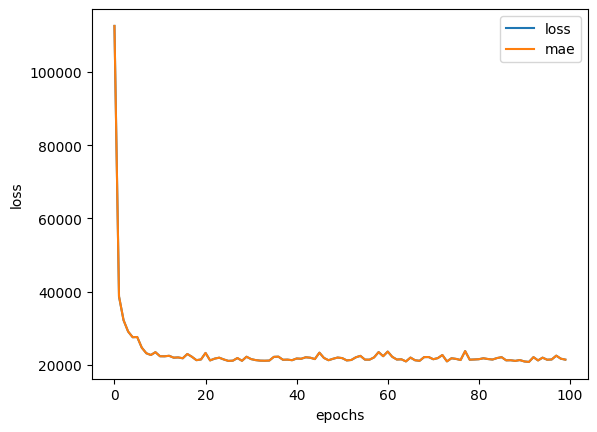

In [42]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [43]:
y_pred = housing_price_model.predict(X_test_normal)

46/46 [==============================] - 0s 2ms/step


In [62]:
df = pd.DataFrame(y_pred, columns=["SalePrice"])
df.rename_axis('Id').to_csv("predictions.csv")

In [61]:
df.head()

,SalePrice
0,116464.625000
1,161027.171875
2,169028.671875
3,185950.656250
4,199703.046875


**Note** -> Further data preprocessing is needed in order to submit the predictions to kaggle

ToDO
1. Handle Empty columns from predictions.
2. More Feature Engineering.
3. Improve the model.
